In [ ]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
plt.rc('font', family='Malgun Gothic') 

In [ ]:
df = pd.read_excel('/content/drive/Shareddrives/2021 팜 경진대회/3 코드/2-1 클러스터링/산일구비_최종_데이터셋.xlsx')
df1 = df.iloc[:, [0,6,16,17,18,19,20,21,22,23,24]]
df1.head()

,자치구/동,종사자수,기초생활수급자 인원_비율,65세 이상 인구 수_비율,단장기 외국인 체류자 수_비율,우체국 수_비율,편의점 수_비율,약국 24시간_비율,ATM 수_비율,응급실 수_비율,은행 수_합계_비율
0,종로구 사직동,47522,0.013375,0.184655,0.112874,1.626016,24.390244,0.0,13.008130,0.000000,19.512195
1,종로구 삼청동,4601,0.014834,0.227207,0.085967,1.342282,4.697987,0.0,2.684564,0.000000,3.355705
2,종로구 부암동,3454,0.015225,0.181994,0.054414,0.440529,4.405286,0.0,2.202643,0.000000,0.881057
3,종로구 평창동,3447,0.007472,0.186518,0.029408,0.000000,1.691094,0.0,0.450958,0.000000,0.338219
4,종로구 무악동,1644,0.018599,0.167987,0.011421,0.000000,11.111111,0.0,5.555556,2.777778,5.555556


In [ ]:
df = pd.read_excel('/content/drive/Shareddrives/2021 팜 경진대회/3 코드/2-1 클러스터링/산일구비_최종_데이터셋.xlsx')
df = df.iloc[:, [6,16,17,18,19,20,21,22,23,24]]
df

,종사자수,기초생활수급자 인원_비율,65세 이상 인구 수_비율,단장기 외국인 체류자 수_비율,우체국 수_비율,편의점 수_비율,약국 24시간_비율,ATM 수_비율,응급실 수_비율,은행 수_합계_비율
0,47522,0.013375,0.184655,0.112874,1.626016,24.390244,0.0,13.008130,0.000000,19.512195
1,4601,0.014834,0.227207,0.085967,1.342282,4.697987,0.0,2.684564,0.000000,3.355705
2,3454,0.015225,0.181994,0.054414,0.440529,4.405286,0.0,2.202643,0.000000,0.881057
3,3447,0.007472,0.186518,0.029408,0.000000,1.691094,0.0,0.450958,0.000000,0.338219
4,1644,0.018599,0.167987,0.011421,0.000000,11.111111,0.0,5.555556,2.777778,5.555556
...,...,...,...,...,...,...,...,...,...,...
419,5646,0.018645,0.171841,0.013078,0.000000,31.372549,0.0,1.960784,0.000000,1.960784
420,14208,0.015220,0.174306,0.052281,0.636943,31.847134,0.0,8.280255,0.000000,1.910828
421,21237,0.041175,0.170891,0.021071,0.460829,27.649770,0.0,3.225806,0.460829,4.147465
422,17586,0.060275,0.158318,0.014794,0.357143,10.714286,0.0,1.785714,0.000000,0.714286


In [ ]:
df=df.iloc[:,[1,2,4,7]]
df.head()

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,0.013375,0.184655,1.626016,13.008130
1,0.014834,0.227207,1.342282,2.684564
2,0.015225,0.181994,0.440529,2.202643
3,0.007472,0.186518,0.000000,0.450958
4,0.018599,0.167987,0.000000,5.555556


In [ ]:
# data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   기초생활수급자 인원_비율   424 non-null    float64
 1   65세 이상 인구 수_비율  424 non-null    float64
 2   우체국 수_비율        424 non-null    float64
 3   ATM 수_비율        424 non-null    float64
dtypes: float64(4)
memory usage: 13.4 KB


In [ ]:
# from sklearn.preprocessing import StandardScaler

# standard_scaler = StandardScaler()
# scaled_df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns) # scaled된 데이터

# 정규화
from sklearn.preprocessing import MinMaxScaler
standard_scaler = MinMaxScaler()
scaled_df = standard_scaler.fit_transform(df)

In [ ]:
scaled_df

array([[0.00685955, 0.4618756 , 0.37398374, 0.23848238],
       [0.00762051, 0.64730718, 0.30872483, 0.049217  ],
       [0.00782487, 0.4502762 , 0.10132159, 0.04038179],
       ...,
       [0.02136152, 0.40189206, 0.10599078, 0.05913978],
       [0.03132487, 0.34710337, 0.08214286, 0.0327381 ],
       [0.01537441, 0.16944486, 0.17358491, 0.02075472]])

In [ ]:
plt.rc('font', family='gulim')

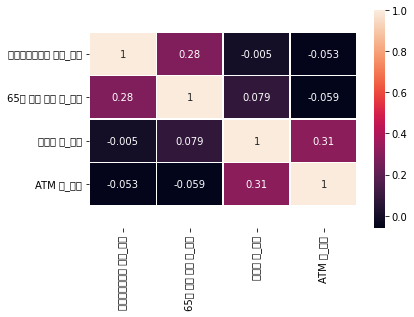

In [ ]:
g = sns.heatmap(df.corr(), annot=True, linewidths=.5)
bottom, top = g.get_ylim() # heatmap plot이 잘리는 것 방지하기 위한 방법
g.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [ ]:
pca = PCA(n_components=2)
reduced_df = pd.DataFrame(pca.fit_transform(scaled_df))
# r_scaled_df = pd.DataFrame(standard_scaler.fit_transform(reduced_df)) 
# print(reduced_df.shape, r_scaled_df.shape)
reduced_df

,0,1
0,0.294708,0.007339
1,0.228429,0.225347
2,-0.011966,0.073199
3,-0.111570,0.114618
4,-0.107144,0.023848
...,...,...
419,-0.118567,0.049408
420,0.049262,0.016926
421,-0.013203,0.024287
422,-0.053175,-0.019696


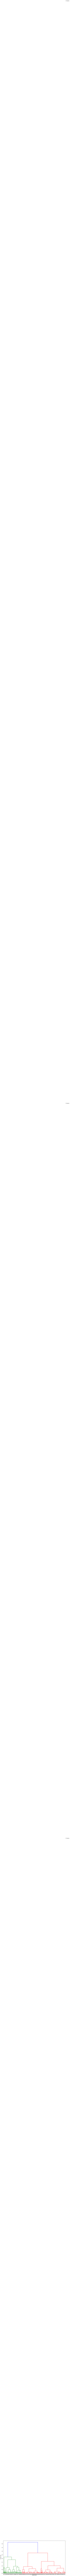

In [ ]:
plt.figure(figsize=(15,8))
linkage_array = ward(reduced_df)
dendrogram(linkage_array)
plt.xlabel("Sample Num")
plt.ylabel("Cluster Dist")

# 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [350, 350], '--', c='k')
ax.plot(bounds, [200, 200], '--', c='k')
ax.plot(bounds, [100, 100], '--', c='k')
ax.text(bounds[1], 350, ' 1 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 200, ' 3 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 100, ' 5 Clusters ', va='center', fontdict={'size': 10})
plt.show()

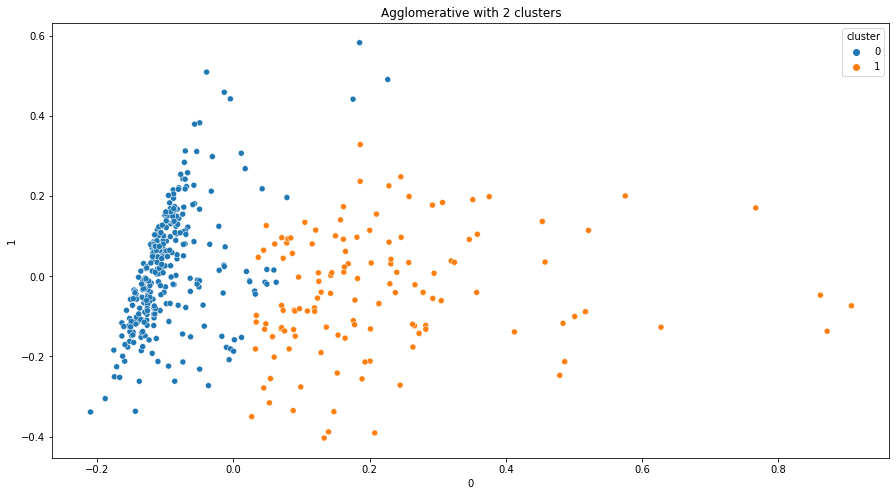

Silhouette Coefficient: 0.4439
Davies Bouldin Index: 1.0103


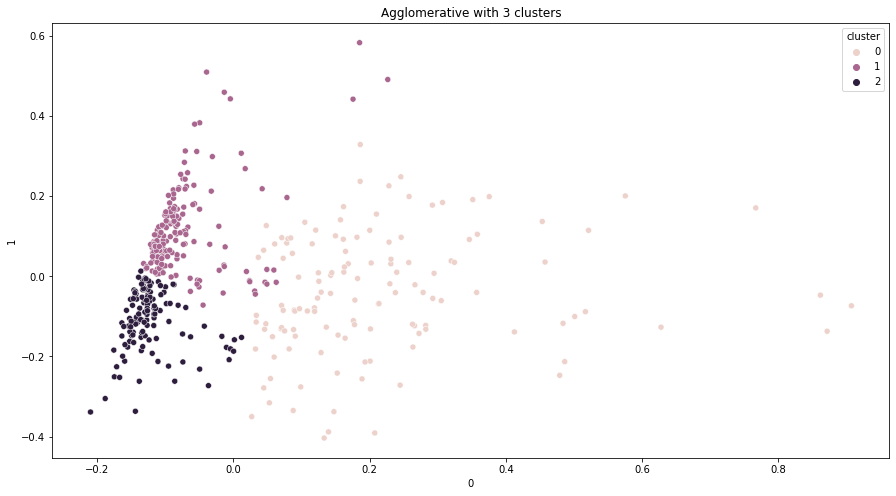

Silhouette Coefficient: 0.3707
Davies Bouldin Index: 0.8371


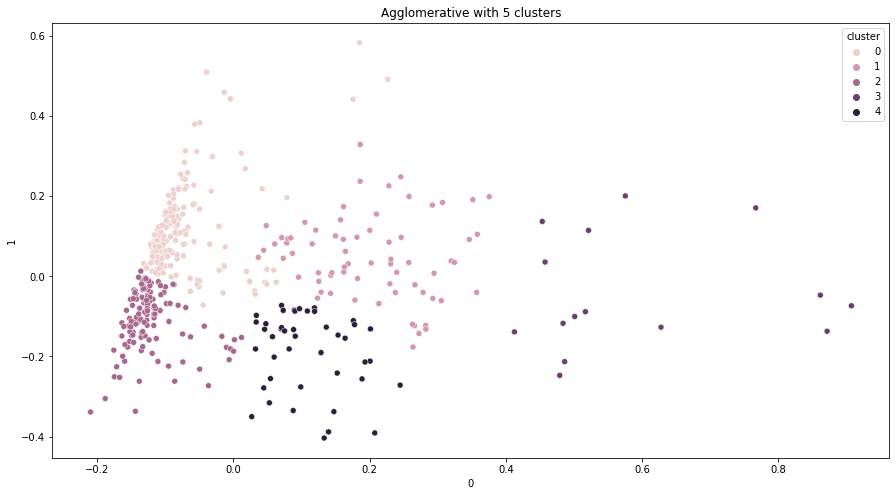

Silhouette Coefficient: 0.3991
Davies Bouldin Index: 0.8125


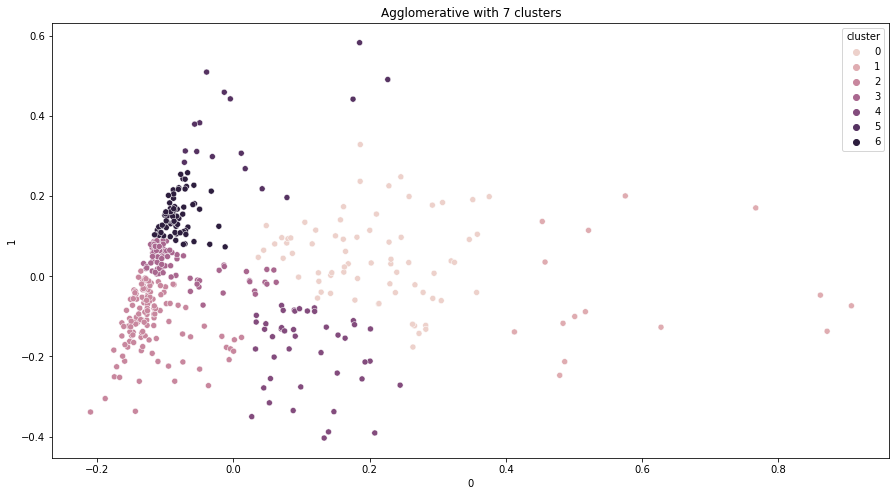

Silhouette Coefficient: 0.3458
Davies Bouldin Index: 0.8319


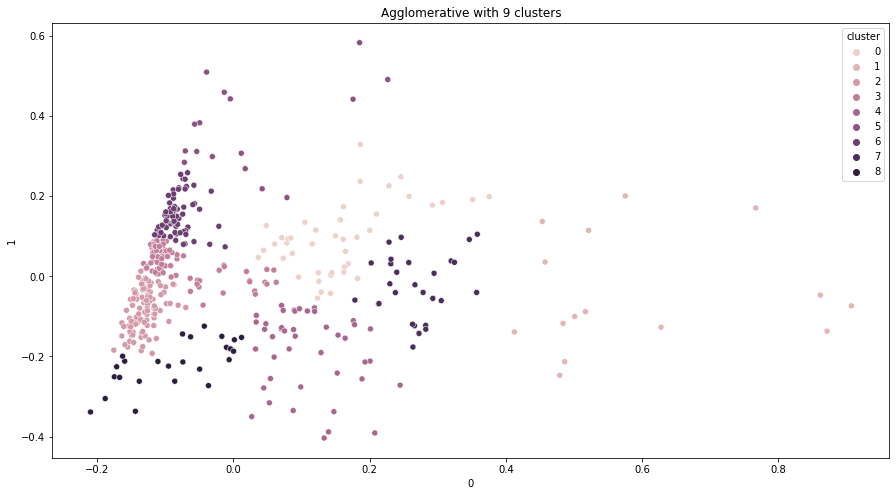

Silhouette Coefficient: 0.3426
Davies Bouldin Index: 0.9247


In [ ]:
n = [2,3,5,7,9]
for i in n:
    plt.figure(figsize=(15,8))
    agg = AgglomerativeClustering(n_clusters=i)
    cluster = agg.fit(reduced_df)
    # cluster = agg.fit(r_scaled_df)
    cluster_id = pd.DataFrame(cluster.labels_)
    
    d4 = pd.DataFrame()
    d4 = pd.concat([reduced_df,cluster_id],axis=1)
    d4.columns = [0, 1, "cluster"]
    
    sns.scatterplot(d4[0], d4[1], hue = d4['cluster'], legend="full")
    plt.title('Agglomerative with {} clusters'.format(i))
    plt.show()
    
    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d4.iloc[:,:-1], d4['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d4.iloc[:,:-1], d4['cluster'])))

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import math

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(clustering, X_features, cluster_lists=[1]): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        if clustering[0] == 'hierarchical':
            model = AgglomerativeClustering(n_clusters=n_cluster, linkage=clustering[1])
        elif clustering[0] == 'kmeans':
            model = KMeans(n_clusters=n_cluster)
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        cluster_labels = model.fit_predict(X_features)
        
        #if clustering[0] == 'dbscan':
        #    n_cluster = len(set(cluster_labels))-1
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([-1, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
params = {
    'linkage':['single', 'complete', 'average', 'ward'],
    'n_clusters':[2, 3, 4, 5, 6, 7]}

scores_hierarcical= {}
for linkage in params['linkage']:
    for n_cluster in params['n_clusters']:
        hierarchical = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
        hierarchical.fit(df)
        score = silhouette_score(df, hierarchical.labels_)
        scores_hierarcical['_'.join(['original', linkage, str(n_cluster)])] = score
        
        hierarchical = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
        hierarchical.fit(scaled_df)
        score = silhouette_score(scaled_df, hierarchical.labels_)
        scores_hierarcical['_'.join(['scaling', linkage, str(n_cluster)])] = score

pd.Series(scores_hierarcical).sort_values(ascending=False)[:10]

# 전반적으로 scaling을 적용한 후에 silhouette score가 낮아졌다.
# 아무래도 scaling하기 전의 척도가 군집화를 수행함에 있어 적절했던 것으로 예상된다.
# (데이터마다 scaling이 좋을수도, 나쁠수도 있다.)

original_single_2      0.886781
original_average_2     0.886781
original_single_3      0.801296
original_complete_2    0.791331
original_complete_3    0.757609
original_single_4      0.742337
scaling_average_2      0.725825
scaling_single_2       0.725825
scaling_complete_2     0.725825
original_average_3     0.725477
dtype: float64

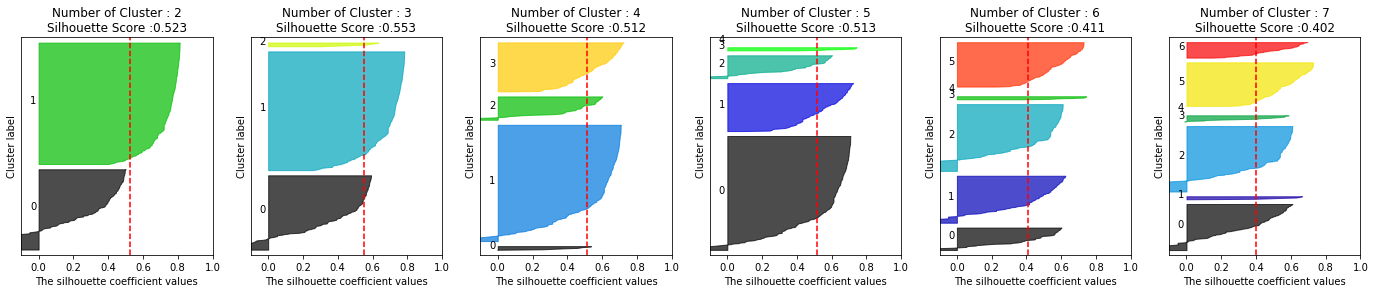

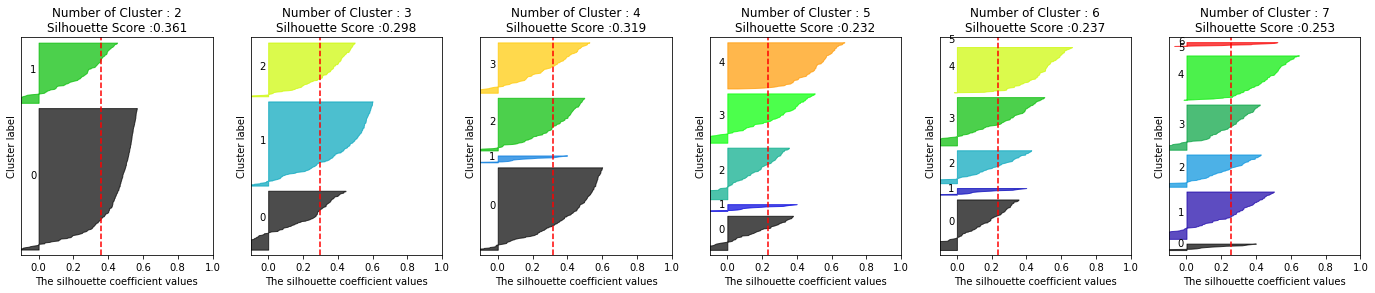

In [ ]:
# 위의 결과를 바탕으로 silhouette score를 확인해보았다.
# 실루엣 지수 해석 시 silhouette score만 좋다고 해서 좋은 clustering이라고 판단하면 안된다.
# 한 cluster silhouette 지수가 좋아서 전반적인 silhouette score가 높은 것이라면 그것은 clustering이 잘 되었다고 해석하기에는 무리가 있기 때문이다.

# 아래의 그림을 보면 cluster=6일 때 silhouette score가 높지만 5일 때도 유사하게 높으며 또한 5개의 cluster로 분류된 경우 전반적으로 모든 cluster의 실루엣 지수가 높다.
# 6개보다 5개로 군집화 했을 경우 silhouette 지수가 음수인 경우가 드물어 보인다.
# 따라서 무작정 군집의 수를 6으로 설정하기 보다는 5개인 경우와 6개인 경우를 모두 시각화해보고 적절해보이는 결과를 채택하는 것이 옳아 보인다.

visualize_silhouette(['hierarchical', 'ward'], df, [2, 3, 4, 5, 6, 7]) # 위가 original data
visualize_silhouette(['hierarchical', 'ward'], scaled_df, [2, 3, 4, 5, 6, 7]) # 아래가 scaled data

In [ ]:
df

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,0.013375,0.184655,1.626016,13.008130
1,0.014834,0.227207,1.342282,2.684564
2,0.015225,0.181994,0.440529,2.202643
3,0.007472,0.186518,0.000000,0.450958
4,0.018599,0.167987,0.000000,5.555556
...,...,...,...,...
419,0.018645,0.171841,0.000000,1.960784
420,0.015220,0.174306,0.636943,8.280255
421,0.041175,0.170891,0.460829,3.225806
422,0.060275,0.158318,0.357143,1.785714


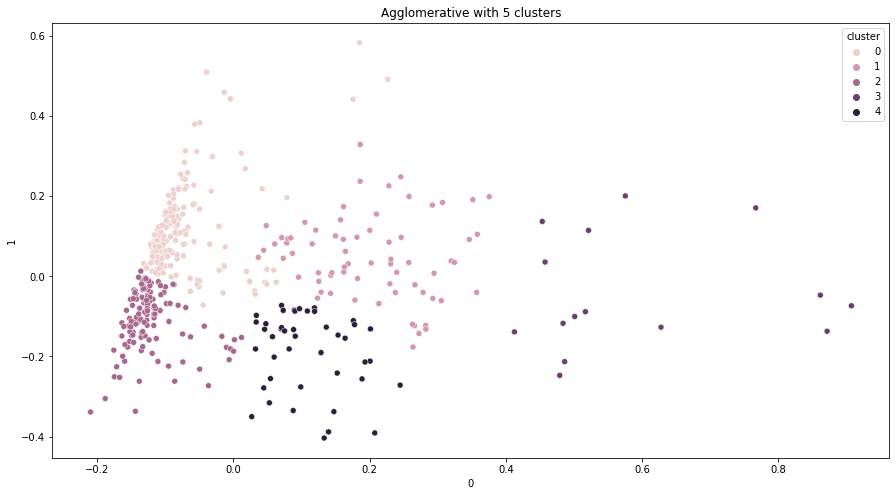

Silhouette Coefficient: 0.3991
Davies Bouldin Index: 0.8125


In [ ]:
# n = [2,3,5,7,9]
# for i in n:
plt.figure(figsize=(15,8))
agg = AgglomerativeClustering(n_clusters=5)
cluster = agg.fit(reduced_df)
cluster_id = pd.DataFrame(cluster.labels_)

d4 = pd.DataFrame()
d4 = pd.concat([reduced_df,cluster_id],axis=1)
d4.columns = [0, 1, "cluster"]

sns.scatterplot(d4[0], d4[1], hue = d4['cluster'], legend="full")
plt.title('Agglomerative with {} clusters'.format(5))
plt.show()

print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d4.iloc[:,:-1], d4['cluster'])))
print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d4.iloc[:,:-1], d4['cluster'])))

In [ ]:
cluster = pd.Series(cluster.labels_)

In [ ]:
cluster

0      1
1      1
2      0
3      0
4      0
      ..
419    0
420    0
421    0
422    0
423    2
Length: 424, dtype: int64

In [ ]:
df1['cluster'] = cluster
df1['cluster'].value_counts()

0    169
2    127
1     70
4     43
3     15
Name: cluster, dtype: int64

In [ ]:
df2 = pd.DataFrame(columns = df1.columns[:-1])
df2

,자치구/동,종사자수,기초생활수급자 인원_비율,65세 이상 인구 수_비율,단장기 외국인 체류자 수_비율,우체국 수_비율,편의점 수_비율,약국 24시간_비율,ATM 수_비율,응급실 수_비율,은행 수_합계_비율


In [ ]:
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
c6=[]
c7=[]
c8=[]
c9=[]
c10=[]


for i in range(5):
    # c1.append(df1[df1['cluster']==i]['종사자수'].mean())
    c2.append(df1[df1['cluster']==i]['기초생활수급자 인원_비율'].mean())
    c3.append(df1[df1['cluster']==i]['65세 이상 인구 수_비율'].mean())
    # c4.append(df1[df1['cluster']==i]['단장기 외국인 체류자 수_비율'].mean())
    c5.append(df1[df1['cluster']==i]['우체국 수_비율'].mean())
    # c6.append(df1[df1['cluster']==i]['편의점 수_비율'].mean())
    # c7.append(df1[df1['cluster']==i]['약국 24시간_비율'].mean())
    c8.append(df1[df1['cluster']==i]['ATM 수_비율'].mean())
    # c9.append(df1[df1['cluster']==i]['응급실 수_비율'].mean())
    # c10.append(df1[df1['cluster']==i]['은행 수_합계_비율'].mean())

# df2['종사자수']=c1
df2['기초생활수급자 인원_비율']=c2
df2['65세 이상 인구 수_비율']=c3
# df2['단장기 외국인 체류자 수_비율']=c4
df2['우체국 수_비율']=c5
# df2['편의점 수_비율']=c6
# df2['약국 24시간_비율']=c7
df2['ATM 수_비율']=c8
# df2['응급실 수_비율']=c9
# df2['은행 수_합계_비율']=c10

In [ ]:
df2

,자치구/동,종사자수,기초생활수급자 인원_비율,65세 이상 인구 수_비율,단장기 외국인 체류자 수_비율,우체국 수_비율,편의점 수_비율,약국 24시간_비율,ATM 수_비율,응급실 수_비율,은행 수_합계_비율
0,NaN,NaN,0.058410,0.189013,NaN,0.095526,NaN,NaN,4.394655,NaN,NaN
1,NaN,NaN,0.045611,0.186434,NaN,1.313825,NaN,NaN,6.273440,NaN,NaN
2,NaN,NaN,0.024707,0.136805,NaN,0.070186,NaN,NaN,5.092569,NaN,NaN
3,NaN,NaN,0.049658,0.187152,NaN,2.925914,NaN,NaN,16.214136,NaN,NaN
4,NaN,NaN,0.026852,0.130646,NaN,1.075469,NaN,NaN,9.008111,NaN,NaN


In [ ]:
# 군집별 특징 파악
df2=df2.drop(['자치구/동','종사자수','단장기 외국인 체류자 수_비율','은행 수_합계_비율','편의점 수_비율','약국 24시간_비율','응급실 수_비율'],axis=True)
df2

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
0,0.058410,0.189013,0.095526,4.394655
1,0.045611,0.186434,1.313825,6.273440
2,0.024707,0.136805,0.070186,5.092569
3,0.049658,0.187152,2.925914,16.214136
4,0.026852,0.130646,1.075469,9.008111


In [ ]:
# 클러스터에 해당하는 행정동 출력
dong0 = []
dong1 = []
dong2 = []
dong3 = []
dong4 = []

data = pd.read_excel('/content/drive/Shareddrives/2021 팜 경진대회/3 코드/2-1 클러스터링/산일구비_최종_데이터셋.xlsx')
for i in range(len(df1)):
    if df1.iloc[i]['cluster']==0:
        dong0.append(df1.iloc[i]['자치구/동'])
    elif df1.iloc[i]['cluster']==1:
        dong1.append(df1.iloc[i]['자치구/동'])
    elif df1.iloc[i]['cluster']==2:
        dong2.append(df1.iloc[i]['자치구/동'])
    elif df1.iloc[i]['cluster']==3:
        dong3.append(df1.iloc[i]['자치구/동'])
    else:
        dong4.append(df1.iloc[i]['자치구/동'])

In [ ]:
dong0

['종로구 부암동',
 '종로구 평창동',
 '종로구 무악동',
 '종로구 가회동',
 '종로구 창신1동',
 '종로구 창신2동',
 '종로구 창신3동',
 '종로구 숭인2동',
 '종로구 청운효자동',
 '중구 필동',
 '중구 장충동',
 '중구 광희동',
 '중구 신당5동',
 '중구 중림동',
 '중구 다산동',
 '중구 청구동',
 '중구 동화동',
 '용산구 용산2가동',
 '용산구 남영동',
 '용산구 용문동',
 '용산구 이촌1동',
 '용산구 이촌2동',
 '용산구 이태원1동',
 '용산구 한남동',
 '성동구 응봉동',
 '성동구 금호1가동',
 '성동구 금호4가동',
 '성동구 성수2가1동',
 '성동구 송정동',
 '성동구 용답동',
 '광진구 중곡3동',
 '광진구 중곡4동',
 '광진구 자양4동',
 '동대문구 청량리동',
 '동대문구 제기동',
 '동대문구 전농2동',
 '동대문구 답십리2동',
 '동대문구 장안1동',
 '동대문구 이문2동',
 '중랑구 면목2동',
 '중랑구 면목4동',
 '중랑구 면목7동',
 '중랑구 중화2동',
 '중랑구 묵1동',
 '중랑구 망우3동',
 '중랑구 신내1동',
 '중랑구 면목본동',
 '중랑구 망우본동',
 '성북구 돈암1동',
 '성북구 정릉1동',
 '성북구 정릉3동',
 '성북구 정릉4동',
 '성북구 장위1동',
 '성북구 성북동',
 '성북구 종암동',
 '성북구 석관동',
 '강북구 번1동',
 '강북구 번3동',
 '강북구 수유1동',
 '강북구 미아동',
 '강북구 우이동',
 '강북구 인수동',
 '도봉구 쌍문1동',
 '도봉구 방학2동',
 '도봉구 방학3동',
 '도봉구 창1동',
 '도봉구 창2동',
 '도봉구 창3동',
 '도봉구 도봉1동',
 '노원구 월계1동',
 '노원구 월계2동',
 '노원구 하계1동',
 '노원구 중계4동',
 '노원구 상계1동',
 '노원구 상계2동',
 '노원구 상계5동',
 '노원구 상계9동',
 '노원구 상계3.4동',
 '노원구 공릉1

In [ ]:
dong1

['종로구 사직동',
 '종로구 삼청동',
 '종로구 종로1.2.3.4가동',
 '종로구 종로5.6가동',
 '용산구 후암동',
 '용산구 이태원2동',
 '용산구 보광동',
 '용산구 청파동',
 '성동구 마장동',
 '성동구 행당1동',
 '성동구 성수2가3동',
 '성동구 금호2.3가동',
 '광진구 중곡2동',
 '광진구 구의1동',
 '광진구 자양2동',
 '동대문구 전농1동',
 '중랑구 중화1동',
 '중랑구 묵2동',
 '중랑구 신내2동',
 '중랑구 면목3.8동',
 '성북구 정릉2동',
 '성북구 월곡1동',
 '성북구 월곡2동',
 '성북구 장위2동',
 '강북구 번2동',
 '강북구 수유2동',
 '강북구 수유3동',
 '강북구 삼양동',
 '강북구 송중동',
 '강북구 송천동',
 '도봉구 쌍문2동',
 '도봉구 쌍문3동',
 '도봉구 방학1동',
 '도봉구 창5동',
 '도봉구 도봉2동',
 '노원구 월계3동',
 '노원구 중계2.3동',
 '은평구 갈현2동',
 '은평구 대조동',
 '은평구 수색동',
 '은평구 응암3동',
 '서대문구 홍제1동',
 '서대문구 북가좌2동',
 '마포구 도화동',
 '양천구 목3동',
 '양천구 신월2동',
 '양천구 신월3동',
 '강서구 화곡4동',
 '구로구 고척1동',
 '구로구 오류1동',
 '금천구 독산4동',
 '금천구 시흥1동',
 '영등포구 여의동',
 '영등포구 당산1동',
 '영등포구 신길5동',
 '영등포구 대림2동',
 '동작구 사당1동',
 '동작구 노량진1동',
 '관악구 은천동',
 '관악구 성현동',
 '관악구 미성동',
 '강남구 일원1동',
 '강남구 일원2동',
 '송파구 풍납1동',
 '송파구 거여1동',
 '송파구 마천1동',
 '송파구 오금동',
 '강동구 명일1동',
 '강동구 성내1동',
 '강동구 성내3동']

In [ ]:
dong2

['종로구 교남동',
 '중구 황학동',
 '용산구 효창동',
 '용산구 서빙고동',
 '성동구 왕십리2동',
 '성동구 행당2동',
 '성동구 성수1가1동',
 '성동구 성수1가2동',
 '성동구 옥수동',
 '광진구 군자동',
 '광진구 중곡1동',
 '광진구 능동',
 '광진구 구의2동',
 '광진구 광장동',
 '광진구 자양1동',
 '광진구 자양3동',
 '동대문구 회기동',
 '동대문구 휘경1동',
 '동대문구 휘경2동',
 '동대문구 장안2동',
 '동대문구 답십리1동',
 '중랑구 상봉2동',
 '성북구 돈암2동',
 '성북구 보문동',
 '성북구 길음1동',
 '성북구 길음2동',
 '성북구 장위3동',
 '성북구 동선동',
 '강북구 삼각산동',
 '도봉구 쌍문4동',
 '도봉구 창4동',
 '노원구 공릉2동',
 '노원구 하계2동',
 '노원구 중계1동',
 '노원구 상계8동',
 '은평구 응암2동',
 '은평구 진관동',
 '서대문구 남가좌1동',
 '서대문구 남가좌2동',
 '서대문구 북가좌1동',
 '서대문구 북아현동',
 '마포구 용강동',
 '마포구 대흥동',
 '마포구 염리동',
 '마포구 신수동',
 '마포구 서교동',
 '마포구 합정동',
 '마포구 연남동',
 '마포구 상암동',
 '마포구 서강동',
 '양천구 목1동',
 '양천구 목2동',
 '양천구 목4동',
 '양천구 신월6동',
 '양천구 신정2동',
 '양천구 신정6동',
 '양천구 목5동',
 '강서구 염창동',
 '강서구 등촌1동',
 '강서구 등촌2동',
 '강서구 화곡2동',
 '강서구 화곡6동',
 '강서구 가양1동',
 '강서구 발산1동',
 '강서구 공항동',
 '강서구 방화1동',
 '강서구 화곡1동',
 '강서구 우장산동',
 '구로구 신도림동',
 '구로구 구로5동',
 '구로구 가리봉동',
 '금천구 독산1동',
 '영등포구 당산2동',
 '영등포구 양평1동',
 '영등포구 양평2동',
 '동작구 상도1동',
 '동작구 사당5동',
 '동작구 대

In [ ]:
dong3

['종로구 이화동',
 '종로구 숭인1동',
 '중구 회현동',
 '중구 명동',
 '중구 을지로동',
 '중구 신당동',
 '중구 약수동',
 '용산구 원효로2동',
 '동대문구 용신동',
 '성북구 삼선동',
 '서대문구 충현동',
 '마포구 성산1동',
 '양천구 신정1동',
 '강서구 등촌3동',
 '구로구 구로4동']

In [ ]:
dong4

['종로구 혜화동',
 '중구 소공동',
 '용산구 원효로1동',
 '용산구 한강로동',
 '성동구 사근동',
 '성동구 왕십리도선동',
 '광진구 화양동',
 '광진구 구의3동',
 '동대문구 이문1동',
 '중랑구 면목5동',
 '중랑구 상봉1동',
 '성북구 안암동',
 '노원구 중계본동',
 '노원구 상계10동',
 '노원구 상계6.7동',
 '은평구 응암1동',
 '서대문구 신촌동',
 '마포구 공덕동',
 '마포구 아현동',
 '강서구 화곡본동',
 '구로구 구로1동',
 '구로구 구로3동',
 '금천구 가산동',
 '영등포구 신길7동',
 '영등포구 영등포동',
 '영등포구 문래동',
 '동작구 상도2동',
 '동작구 신대방2동',
 '관악구 행운동',
 '관악구 신림동',
 '서초구 서초1동',
 '서초구 서초3동',
 '서초구 반포본동',
 '서초구 방배본동',
 '강남구 논현2동',
 '강남구 삼성2동',
 '강남구 역삼1동',
 '강남구 역삼2동',
 '송파구 방이2동',
 '송파구 송파1동',
 '송파구 삼전동',
 '송파구 가락본동',
 '송파구 문정2동']